# ***Premise***
---
---

# ***Questions***
---
---

+ **Easy**
    + Which year had the most meteors?
        - _2013_
    + What is the average mass of a meteors we've observed?
+ **Hard**
    + Are there more meteors around the equator or the poles?
    + What time of year got the most asteroids? (Noticable trends in year data)
+ **Other**
    + How many meteors fell in important years (birth year(1995), Y2K, 2008(Obama), 2020(Now))?


# ***Concepts to cover***
---
---

- [x] Histograms
- [ ] PDF
- [ ] CDF
- [ ] Hypothesis Testing
- [ ] Confidence Interval
- [ ] Correlation
- [ ] Outliers
- [ ] Normal Distribution
- [ ] Time Analysis

# ***Imports***
---
---

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
import plotly.express as px
from geopy.geocoders import Nominatim
import geopy as gp
from datetime import datetime

# ***Data***
---
---

In [17]:
data = pd.read_csv('../data/meteorite-landings.csv')
# data = pd.read_csv('../data/Meteorite_Landings.csv')
print(data.columns)

data.head()


Index(['name', 'id', 'nametype', 'recclass', 'mass', 'fall', 'year', 'reclat',
       'reclong', 'GeoLocation'],
      dtype='object')


,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"


## Basic Statistics

In [18]:
print("Data described: \n")
print(data.describe())
print('\n')
print("Data info: \n")
print(data.info())

Data described: 

                 id          mass          year        reclat       reclong
count  45716.000000  4.558500e+04  45428.000000  38401.000000  38401.000000
mean   26889.735104  1.327808e+04   1991.772189    -39.122580     61.074319
std    16860.683030  5.749889e+05     27.181247     46.378511     80.647298
min        1.000000  0.000000e+00    301.000000    -87.366670   -165.433330
25%    12688.750000  7.200000e+00   1987.000000    -76.714240      0.000000
50%    24261.500000  3.260000e+01   1998.000000    -71.500000     35.666670
75%    40656.750000  2.026000e+02   2003.000000      0.000000    157.166670
max    57458.000000  6.000000e+07   2501.000000     81.166670    354.473330


Data info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45716 non-null  object 
 1   id           45716 non-null  int64  
 2   n

*Conclusions / Questions*
    - There are missing values in mass, year, and locations
    - Appropriate data types thus far

# ***Cleaning***
---
---


## Rename columns

In [19]:
data.rename(columns={'recclass':'class', 'reclat':'lat', 'reclong':'long', 'mass (g)':'mass'}, inplace=True)
data

,name,id,nametype,class,mass,fall,year,lat,long,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037000, 17.018500)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.783330, 8.966670)"
45713,Zlin,30410,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.250000, 17.666670)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460,"(49.789170, 41.504600)"


*Conclusions / Questions*
    - ...

## Outliers

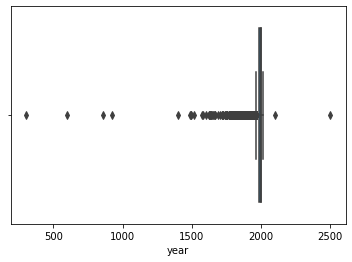

In [20]:
sns.boxplot(x=data['year'])

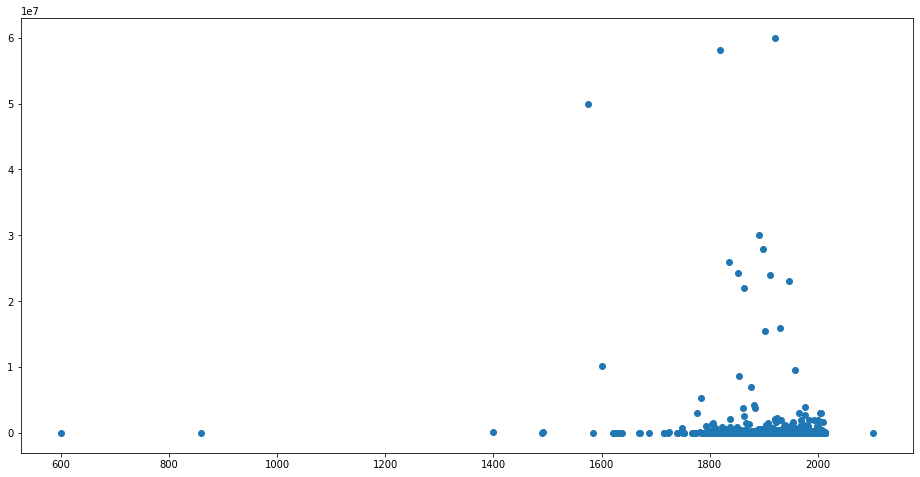

In [21]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(data['year'], data['mass'])
# ax.set_xlabel('Proportion of non-retail business acres per town')
# ax.set_ylabel('Full-value property-tax rate per $10,000')
plt.show()

# ***Statistical Plotting***
---
---

## Fall vs Fallen Histogram

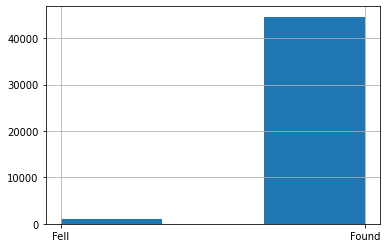

In [22]:
data['fall'].hist(bins=3)  # 
plt.show()

*Conclusions / Questions*
    - ...

## Equator or Poles

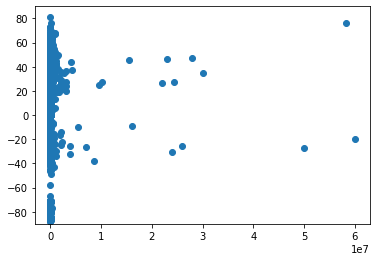

Above Equator: 8550 

At Equator: 6438 

Below Equator: 23413 



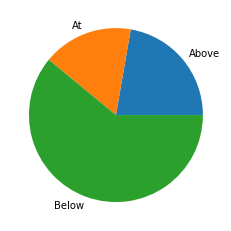

In [23]:
plt.scatter(data.mass, data.lat)
# print(data[data['lat']>0].count())
# print(data[data['lat']<0].count())
axes = plt.gca()
axes.set_ylim([-90,90])
above_equator = data[data.lat >0].shape[0]
at_equator = data[data.lat ==0].shape[0]
below_equator = data[data.lat <0].shape[0]
plt.show()

print("Above Equator:", above_equator, '\n')
print("At Equator:", at_equator, '\n')
print("Below Equator:", below_equator, '\n')

labels = ["Above", 'At', 'Below']
values = [above_equator, at_equator, below_equator]
plt.pie(values, labels=labels)
plt.show()

*Conclusions / Questions*
    - There are missig values because of the `Nan` values that I didn't remove. If I do remove then and replace them with 0, then it'ss alter results of values that actually are on the equator or prime meridian

## Box Plot

*Conclusions / Questions*
    - ...

## PDF

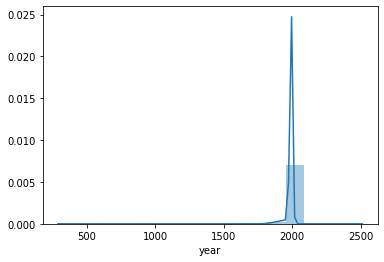

In [10]:
sns.distplot(data['year'].dropna(), hist=True, kde=True, bins=16)

*Conclusions / Questions*
    - ...

## CDF

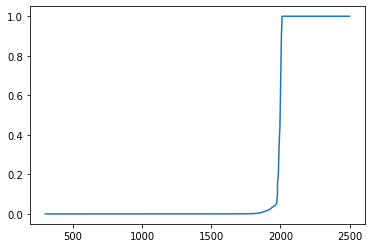

In [24]:
ls_year = data['year'].dropna().values

def calculate_cdf(x, threshold):
    return np.sum(x <= threshold)

# Create an array cdf_age where each value is the cdf of the age for each threshold
cdf_year = [calculate_cdf(ls_year, r)/len(ls_year) for r in range(int(np.min(ls_year)), int(np.max(ls_year)))]

plt.plot(range(int(np.min(ls_year)), int(np.max(ls_year))), cdf_year)


*Conclusions / Questions*
    - ...

## Violin Plot

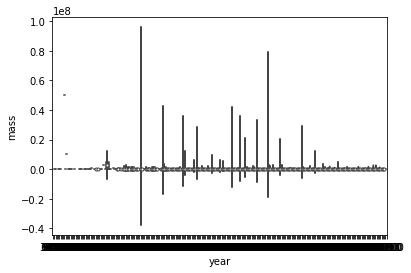

In [12]:
sns.violinplot(x="year", y="mass", data=data)


*Conclusions / Questions*
    - Why are the masses in the violin plot negative?

## Correlation

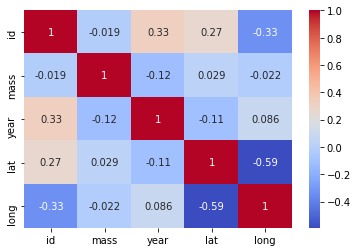

In [13]:
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')


*Conclusions / Questions*
    - Why are the masses in the violin plot negative?

# ***Various Plotting***
---
---

## See the top 10 classification of meteors

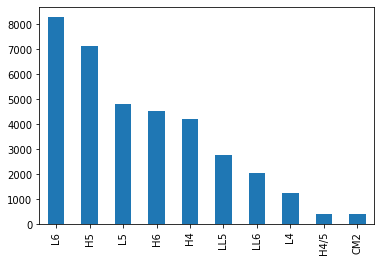

In [14]:
top_10_class = data['class'].value_counts()[:10]
plt.bar(top_10_class, height = 1)

top_10_class.plot(kind='bar')

*Conclusions / Questions*
    - ...

## Lat and Long scatter plot, using mass as bubble size
- ***Latitude are y values  (90 through -90)***
- ***Longitude are x values (-180 to 180)***

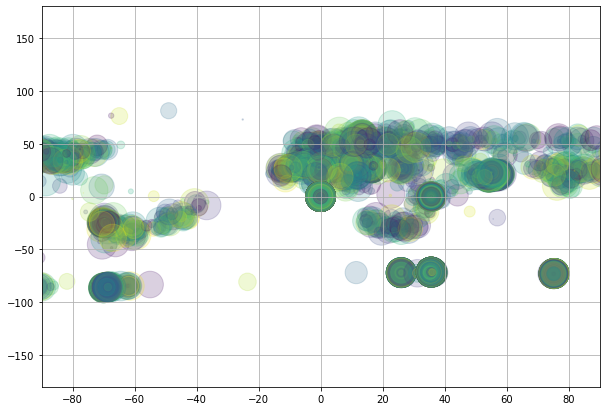

In [25]:
plt.figure(figsize=(10,7))
N = len(data['mass'])
area = (30 * np.random.rand(N))**2  # 0 to 15 point radii
colors = np.random.rand(N)
plt.scatter(data['long'], data['lat'], s=area, c=colors, alpha=0.2)

plt.grid(True)
axes = plt.gca()
axes.set_xlim([-90,90])
axes.set_ylim([-180,180])
plt.show()


*Conclusions / Questions*
    - ...

## Geolocation Function using geopy


In [ ]:
# geolocator = Nominatim(user_agent="project_impact")
# coor=gp.Point(data['lat'][1], data['long'][1])
# location = geolocator.reverse(coor)
# print(location.raw['address'].get('country'))

## Geolocations loop

In [ ]:
# lists = []
# for i in range(20):
#     lats = data['lat'].get(key = i)
#     longs = data['long'].get(key = i)
#     coor = gp.Point(lats, longs)
#     country = geolocator.reverse(gp.Point(coor)).raw['address'].get('country')
#     lists.append(country)
# print(lists)

## Year Value Counts

In [16]:
print(data['year'].value_counts())
# data['recclass'].value_counts().plot(kind='bar')  # bar chart of the amount embarked passengers by class

2003.0    3323
1979.0    3046
1998.0    2697
2006.0    2456
1988.0    2296
          ... 
1779.0       1
2101.0       1
601.0        1
1820.0       1
1636.0       1
Name: year, Length: 268, dtype: int64


## Time Analysis

In [17]:
data['year'].fillna(0).astype(int)


0        1880
1        1951
2        1952
3        1976
4        1902
         ... 
45711    1990
45712    1999
45713    1939
45714    2003
45715    1976
Name: year, Length: 45716, dtype: int64

*Conclusions / Questions*
    - ...

Years describes:  count     268.000000
mean      169.507463
std       503.018592
min         1.000000
25%         2.000000
50%        10.000000
75%        22.000000
max      3323.000000
Name: year, dtype: float64 

Confirming amount of unique year 268 

Year with most recorded data: 2501.0
Total span of year data:  2200.0 years



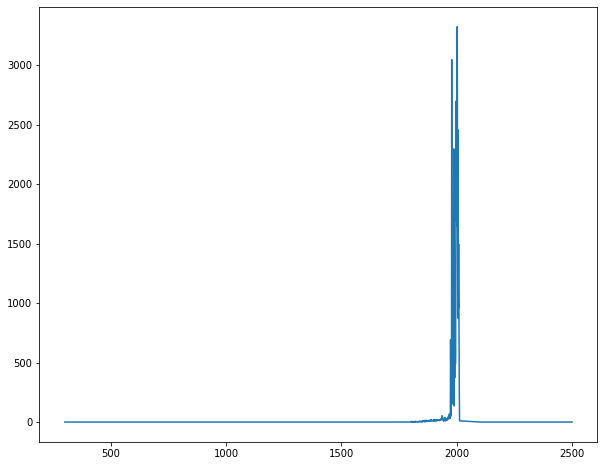

In [18]:
year_count = data.groupby('year')['year'].count()
plt.figure(figsize=(10,8))
plt.plot(year_count)
print("Years describes: ", year_count.describe(), '\n')
print("Confirming amount of unique year", data.year.nunique(), '\n')
print("Year with most recorded data:", data.year.max())
print("Total span of year data: ", data.year.max()-data.year.min(), 'years\n')
# plt.hist(year_count)

*Conclusions / Questions*
    - ...